In [1]:
import os
import pandas as pd

dataset_path = os.path.join(os.curdir, "datasets")
train_df = pd.read_csv(os.path.join(dataset_path, "BostonHouseTrain.csv"), index_col=0)
test_df = pd.read_csv(os.path.join(dataset_path, "BostonHouseTest.csv"), index_col=0)

X_train = train_df.values[:,:-1]
y_train = train_df.values[:,-1]
X_test = test_df.values[:,:-1]
y_test = test_df.values[:,-1]

train_df.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,class
352,0.07950,60.0,1.69,0,0.411,6.579,35.9,10.7103,4,411,18.3,370.78,5.49,high
351,0.06211,40.0,1.25,0,0.429,6.490,44.4,8.7921,1,335,19.7,396.90,5.98,high
316,0.25356,0.0,9.90,0,0.544,5.705,77.7,3.9450,4,304,18.4,396.42,11.50,low
285,0.00906,90.0,2.97,0,0.400,7.088,20.8,7.3073,1,285,15.3,394.72,7.85,high
393,11.57790,0.0,18.10,0,0.700,5.036,97.0,1.7700,24,666,20.2,396.90,25.68,low


In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

cols = ["min_samples_split", "NodeCount", "TrainAcc", "TestAcc"]
frame = pd.DataFrame(columns = cols)

for mss in range(2, 40):
    clf = DecisionTreeClassifier(min_samples_split=mss).fit(X_train, y_train)
    
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    node_count = clf.tree_.node_count
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    frame = frame.append(dict(zip(cols,[mss, node_count, train_acc, test_acc])), ignore_index=True)
frame = frame.sort_values(by="TestAcc").reset_index()
frame = frame.iloc[[0, len(frame)//2, -1]]

frame

,index,min_samples_split,NodeCount,TrainAcc,TestAcc
0,6,8.0,99.0,0.9325,0.716981
19,24,26.0,55.0,0.8425,0.783019
37,28,30.0,51.0,0.8400,0.820755


In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

def get_data_as_ndarray(df):
    X = df.values[:,:-1] 
    y = df.values[:,-1] 
    return X, y

NEXPS = range(100)
FRACS = [.05, .1, .2, .5, .99]
MSS = range(2, 40)

cols = ["Frac", "Run", "min_samples_split", "NodeCount", "TrainAcc", "TestAcc"]
frame = pd.DataFrame(columns = cols)

for frac in FRACS:
    for exp in NEXPS:
        for mss in MSS:
            sample_train = train_df.sample(frac=frac, random_state=exp)
            X_train, y_train = get_data_as_ndarray(sample_train)
            
            clf = DecisionTreeClassifier(min_samples_split=mss).fit(X_train, y_train)
            
            y_train_pred = clf.predict(X_train)
            y_test_pred = clf.predict(X_test)
            
            node_count = clf.tree_.node_count
            train_acc = accuracy_score(y_train, y_train_pred)
            test_acc = accuracy_score(y_test, y_test_pred)
            
            frame = frame.append(dict(zip(cols,[frac, exp, mss, node_count, train_acc, test_acc])), ignore_index=True)
frame

,Frac,Run,min_samples_split,NodeCount,TrainAcc,TestAcc
0,0.05,0.0,2.0,7.0,1.000000,0.537736
1,0.05,0.0,3.0,5.0,0.950000,0.547170
2,0.05,0.0,4.0,5.0,0.950000,0.547170
3,0.05,0.0,5.0,5.0,0.950000,0.547170
4,0.05,0.0,6.0,5.0,0.950000,0.547170
...,...,...,...,...,...,...
18995,0.99,99.0,35.0,43.0,0.828283,0.811321
18996,0.99,99.0,36.0,45.0,0.830808,0.801887
18997,0.99,99.0,37.0,41.0,0.823232,0.811321
18998,0.99,99.0,38.0,39.0,0.805556,0.801887


min_samples_split
2.0     AxesSubplot(0.125,0.125;0.775x0.755)
3.0     AxesSubplot(0.125,0.125;0.775x0.755)
4.0     AxesSubplot(0.125,0.125;0.775x0.755)
5.0     AxesSubplot(0.125,0.125;0.775x0.755)
6.0     AxesSubplot(0.125,0.125;0.775x0.755)
7.0     AxesSubplot(0.125,0.125;0.775x0.755)
8.0     AxesSubplot(0.125,0.125;0.775x0.755)
9.0     AxesSubplot(0.125,0.125;0.775x0.755)
10.0    AxesSubplot(0.125,0.125;0.775x0.755)
11.0    AxesSubplot(0.125,0.125;0.775x0.755)
12.0    AxesSubplot(0.125,0.125;0.775x0.755)
13.0    AxesSubplot(0.125,0.125;0.775x0.755)
14.0    AxesSubplot(0.125,0.125;0.775x0.755)
15.0    AxesSubplot(0.125,0.125;0.775x0.755)
16.0    AxesSubplot(0.125,0.125;0.775x0.755)
17.0    AxesSubplot(0.125,0.125;0.775x0.755)
18.0    AxesSubplot(0.125,0.125;0.775x0.755)
19.0    AxesSubplot(0.125,0.125;0.775x0.755)
20.0    AxesSubplot(0.125,0.125;0.775x0.755)
21.0    AxesSubplot(0.125,0.125;0.775x0.755)
22.0    AxesSubplot(0.125,0.125;0.775x0.755)
23.0    AxesSubplot(0.125,0.125;0.775

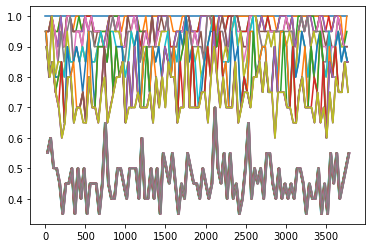

In [41]:
frame[frame["Frac"] == .99].groupby("min_samples_split")["TrainAcc"].plot()

In [52]:
frame[frame[frame[frame["min_samples_split"] == 2]["NodeCount"] < frame[frame["min_samples_split"]>20]]]

,Frac,Run,min_samples_split,NodeCount,TrainAcc,TestAcc
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
18995,NaN,NaN,NaN,NaN,NaN,NaN
18996,NaN,NaN,NaN,NaN,NaN,NaN
18997,NaN,NaN,NaN,NaN,NaN,NaN
18998,NaN,NaN,NaN,NaN,NaN,NaN


BEST TREE
===

In [54]:
import os
import pandas as pd

dataset_path = os.path.join(os.curdir, "datasets")
train_df = pd.read_csv(os.path.join(dataset_path, "BostonHouseTrain.csv"), index_col=0)
test_df = pd.read_csv(os.path.join(dataset_path, "BostonHouseTest.csv"), index_col=0)

X_train = train_df.values[:,:-1]
y_train = train_df.values[:,-1]
X_test = test_df.values[:,:-1]
y_test = test_df.values[:,-1]

train_df.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,class
352,0.07950,60.0,1.69,0,0.411,6.579,35.9,10.7103,4,411,18.3,370.78,5.49,high
351,0.06211,40.0,1.25,0,0.429,6.490,44.4,8.7921,1,335,19.7,396.90,5.98,high
316,0.25356,0.0,9.90,0,0.544,5.705,77.7,3.9450,4,304,18.4,396.42,11.50,low
285,0.00906,90.0,2.97,0,0.400,7.088,20.8,7.3073,1,285,15.3,394.72,7.85,high
393,11.57790,0.0,18.10,0,0.700,5.036,97.0,1.7700,24,666,20.2,396.90,25.68,low


In [53]:
from sklearn.model_selection import GridSearchCV

hparams = {"splitter":["best","random"],
           "max_depth":range(2,50,1),
           "min_samples_leaf":range(1,15,1),
           "min_samples_split":range(2,20,1) 
            }

AttributeError: 'DataFrame' object has no attribute 'read_sql_query'

Post pruning test
---

base test accuracy :: 0.755
best alpha accuracy :: 0.774
best alpha :: 0.008


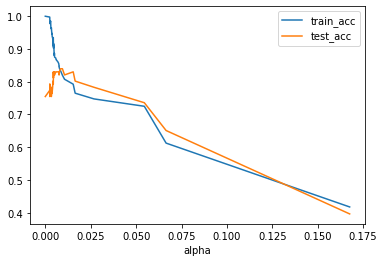

In [102]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

seed = None

cols = ("alpha", "train_acc", "test_acc", "node_count")
df_alpha = pd.DataFrame(columns=cols)

base_clf = DecisionTreeClassifier(random_state=seed, ).fit(X_train, y_train)
print(f"base test accuracy :: {accuracy_score(base_clf.predict(X_test), y_test):.3f}")
path=clf.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas

for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=seed, ccp_alpha=alpha).fit(X_train, y_train)
    
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    train_acc = accuracy_score(y_train, y_train_pred) 
    test_acc = accuracy_score(y_test, y_test_pred) 
    node_count = clf.tree_.node_count
    
    df_alpha = df_alpha.append(dict(zip(cols, (alpha, train_acc, test_acc, node_count))), ignore_index=True)
df_alpha[["alpha", "train_acc", "test_acc"]].plot(x="alpha")

best_alpha = df_alpha.iloc[df_alpha["test_acc"].idxmax()]["alpha"]
best_alpha_clf = DecisionTreeClassifier(random_state=seed, ).fit(X_train, y_train)
print(f"best alpha accuracy :: {accuracy_score(best_alpha_clf.predict(X_test), y_test):.3f}")
print(f"best alpha :: {best_alpha:.3f}")

Pre pruning
---

In [123]:
from sklearn.model_selection import GridSearchCV

params = {'splitter': ("best", "random"),
          'max_depth': range(2, 12),
          'min_samples_split': [2, 3, 4],
          'min_samples_leaf': [1, 2, 3],
          'ccp_alpha': np.arange(.005, .05, .001)}

clf = DecisionTreeClassifier()
cv = GridSearchCV(estimator=clf,param_grid=params, n_jobs=-1, scoring="accuracy")
cv.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid=...
       0.023, 0.024, 0.025, 0.026, 0.027, 0.028, 0.029, 0.03 , 0.031,
       0.032, 0.033, 0.034, 

In [124]:
y_test_pred_pre = cv.best_estimator_.predict(X_test)
print(cv.best_params_)
accuracy_score(y_test, y_test_pred_pre)

{'ccp_alpha': 0.006, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 4, 'splitter': 'random'}


0.839622641509434

In [12]:
import numpy as np
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier, plot_tree

best_params = {'ccp_alpha': 0.006, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 4, 'splitter': 'random'}
clf = DecisionTreeClassifier(**best_params).fit(X_train, y_train)

fi = clf.feature_importances_
argsort = np.argsort(fi)[::-1]
fi = fi[argsort]
cols = train_df.columns[argsort]
print(f"Feature importances :: {dict(zip(cols, fi))}")

export_graphviz(clf, 
                feature_names=train_df.columns[:-1].values,
                filled=True,
                out_file="A1Q3-decision_tree.dot")

!dot -Tpng A1Q3-decision_tree.dot -o A1Q3-decision_tree.png

Feature importances :: {'lstat': 0.4618827965671988, 'tax': 0.2445057017304708, 'rm': 0.08351926699183036, 'crim': 0.058774404391482835, 'rad': 0.0527961383677119, 'nox': 0.04475836690580534, 'age': 0.024498385635386213, 'chas': 0.017102596685340303, 'ptratio': 0.012162342724773458, 'black': 0.0, 'dis': 0.0, 'indus': 0.0, 'zn': 0.0}


In [127]:
train_df.columns[:-1]

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat'],
      dtype='object')